<a href="https://colab.research.google.com/github/eugenioRSJ/EstudoCienciaDeDados/blob/main/Deep_Learning_Previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv")

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 15
import seaborn as sns

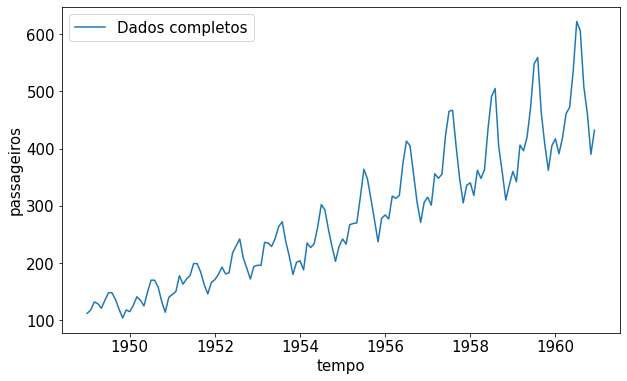

In [5]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="Dados completos")

#Pré processamento dos dados

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
sc = StandardScaler()

In [8]:
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
dado_escalado = sc.transform(passageiros)


In [10]:
x, y = dado_escalado[:,0], dado_escalado[:,1]

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

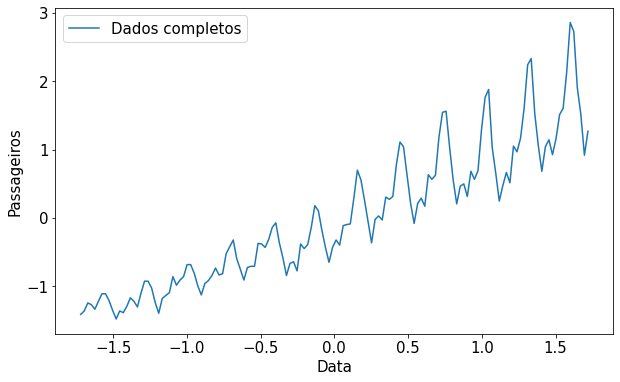

In [12]:
sns.lineplot(x=x, y=y, data=passageiros, label="Dados completos")
plt.ylabel("Passageiros")
plt.xlabel("Data")

In [13]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [14]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

#Criando um modelo de regressão 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
regressor = Sequential()

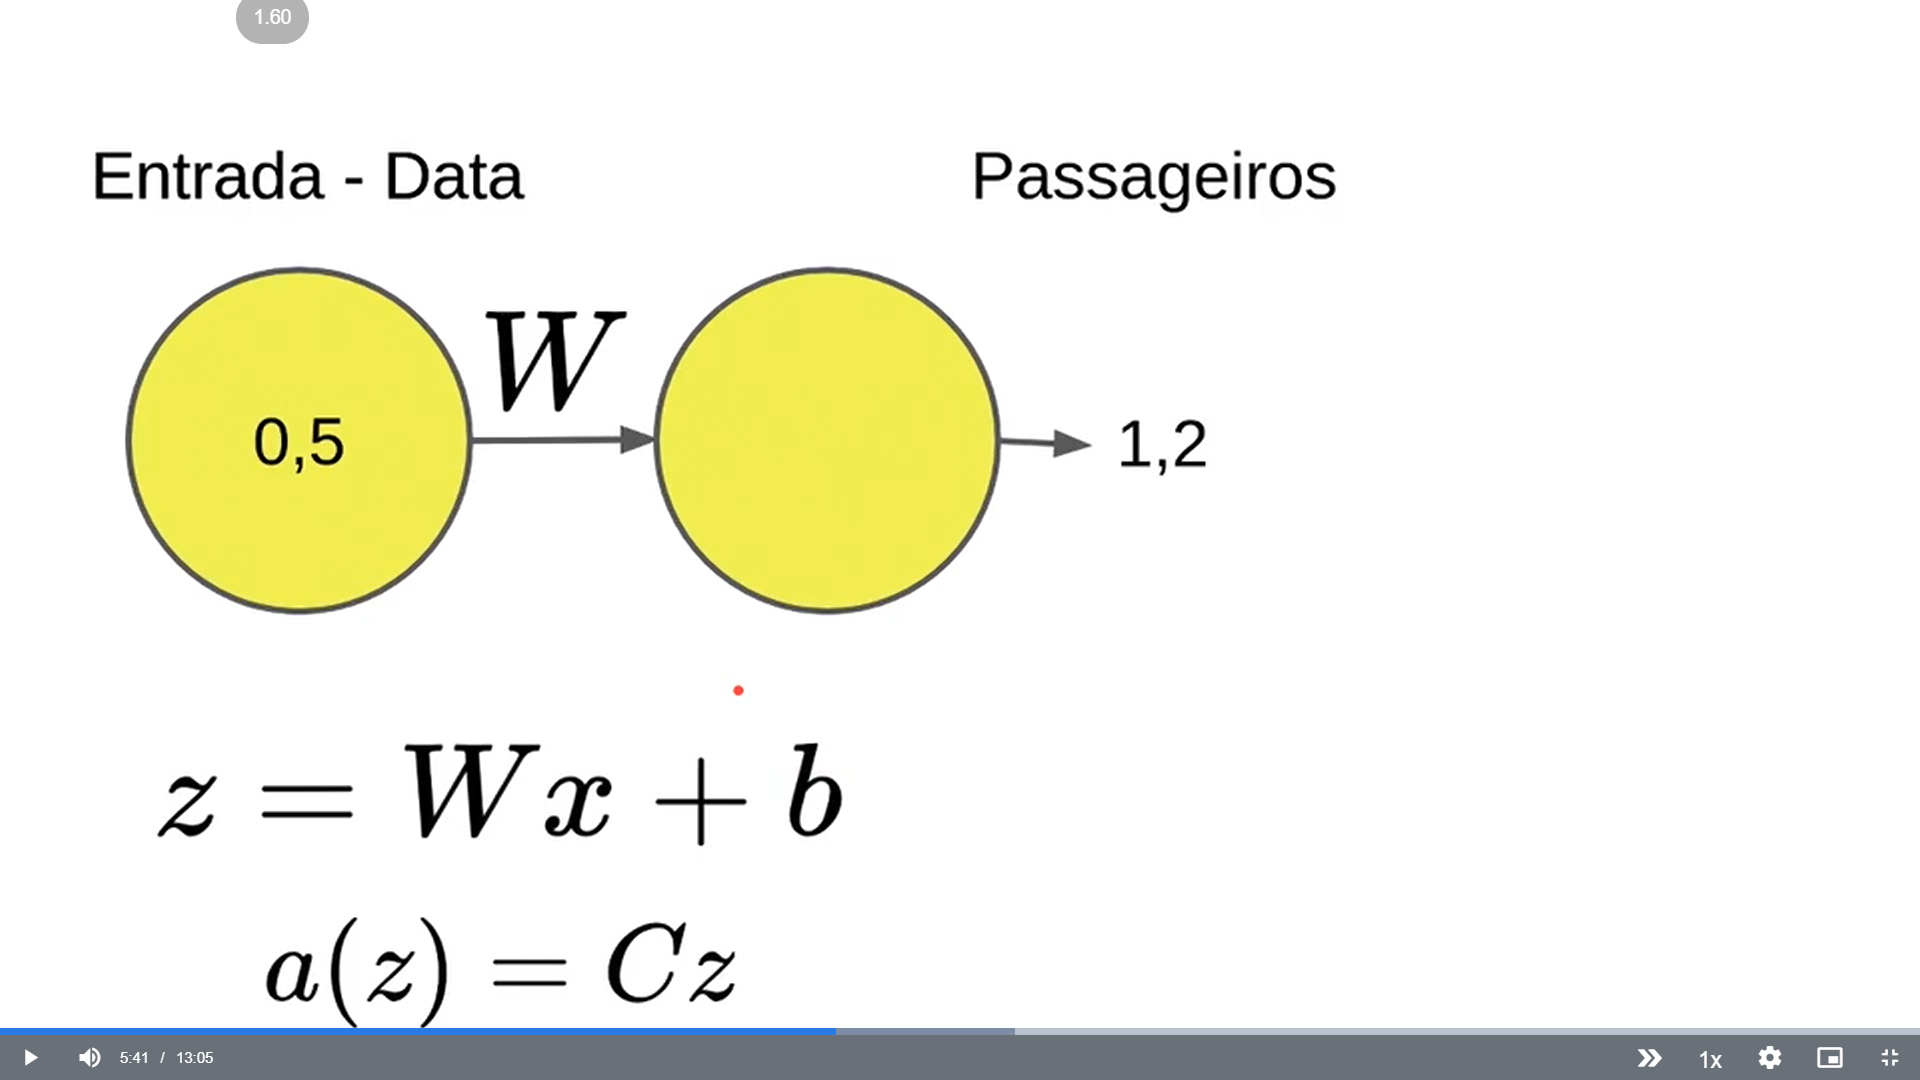![image.png]()

In [17]:
 #dese -> z=W(kernel_inicialize)*x(Entradas) + b(baias), podemos aplicar uma função de ativação o resultado -> a(z) = Cz(activation)
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear',use_bias=False))

In [18]:
#loss -> mede a diferença da estimativa
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 1s 5ms/step - loss: 0.1285


In [20]:
y_predict = regressor.predict(x_treino)

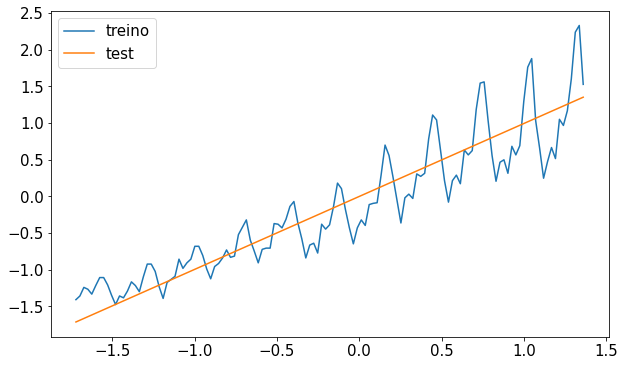

In [21]:
sns.lineplot(x=x_treino, y= y_treino, label="treino")
sns.lineplot(x=x_treino, y= y_predict[:,0], label="test")

In [22]:
d = {'tempo': x_treino, 'passageiros': y_predict[:,0]}

In [23]:
result = pd.DataFrame(data=d)
result.head()

,tempo,passageiros
0,-1.720064,-1.712206
1,-1.696007,-1.688259
2,-1.671950,-1.664312
3,-1.647894,-1.640365
4,-1.623837,-1.616418


In [24]:
resultados_tranf=sc.inverse_transform(result)

In [25]:
resultados_tranf = pd.DataFrame(resultados_tranf, columns=['tempo', 'passageiros'])

In [26]:
resultados_tranf

,tempo,passageiros
0,1949.000000,75.606038
1,1949.083333,78.468865
2,1949.166667,81.331706
3,1949.250000,84.194533
4,1949.333333,87.057374
...,...,...
124,1959.333333,430.597348
125,1959.416667,433.460189
126,1959.500000,436.323016
127,1959.583333,439.185857


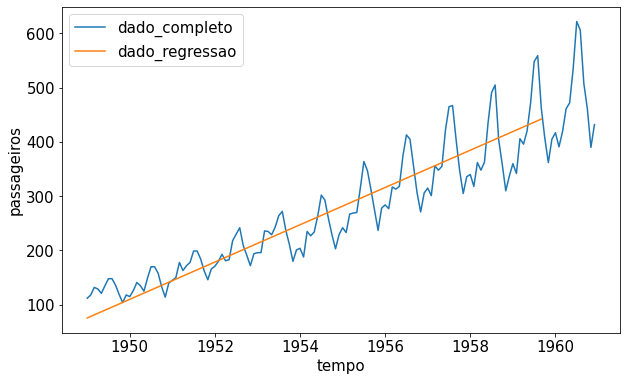

In [27]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_tranf, label='dado_regressao')

In [28]:
y_predict_teste =regressor.predict(x_teste)

###Convertendo os dados

In [29]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}
result_teste = pd.DataFrame(data=d)
resultados_tranf_teste=sc.inverse_transform(result_teste)
resultados_tranf_teste = pd.DataFrame(resultados_tranf_teste, columns=['tempo', 'passageiros'])

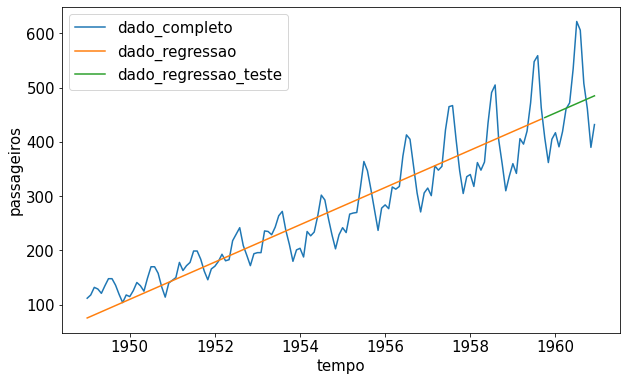

In [30]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_tranf, label='dado_regressao')
sns.lineplot(x='tempo', y='passageiros', data=resultados_tranf_teste, label='dado_regressao_teste')

##Adicionando camadas

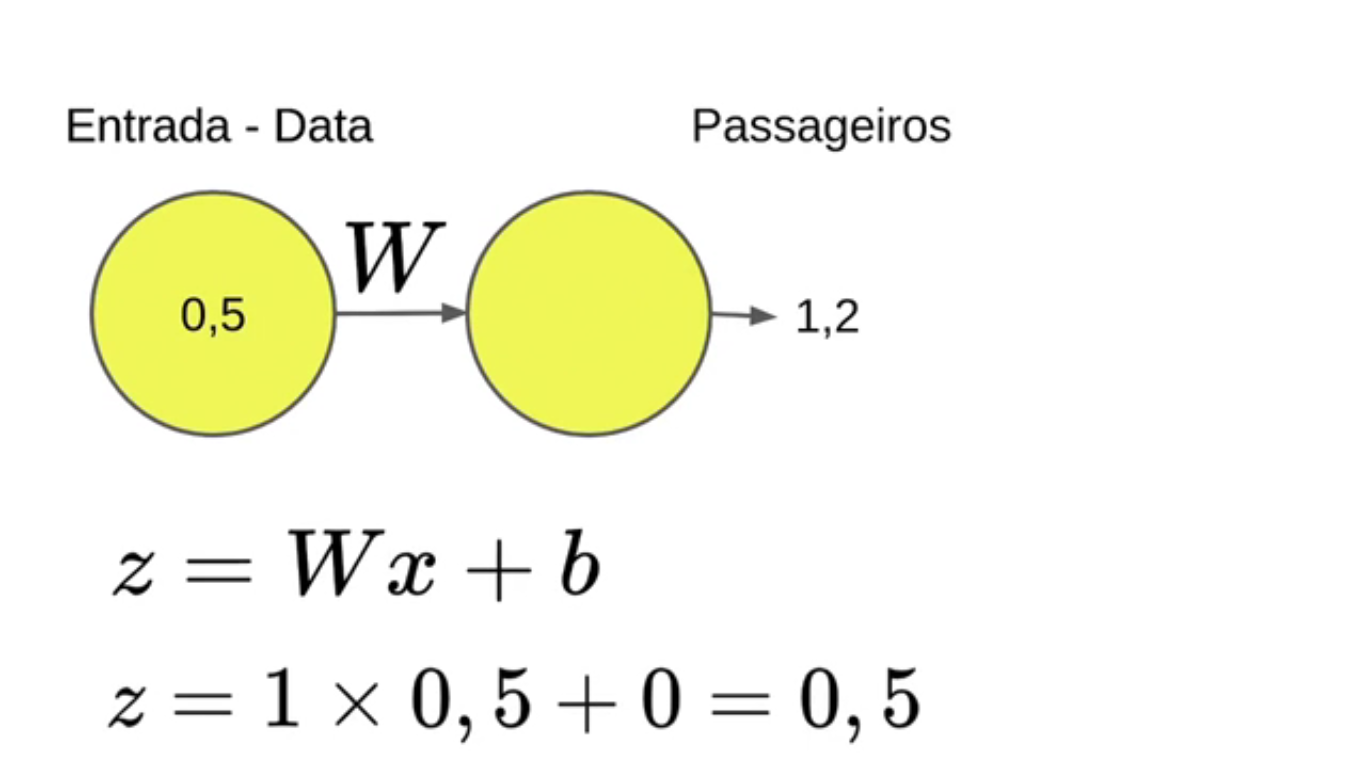

In [31]:
regressor2 = Sequential()

In [32]:
regressor2.add(Dense(8, input_dim = 1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

In [33]:
#loss -> mede a diferença da estimativa
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [35]:
regressor2.fit(x_treino, y_treino,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2235
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 1.2175
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 1.2113
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 1.2048
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1983
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1919
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1856
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1792
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1739
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1692
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1640
Epoch 12/500
5/5 [==============================] - 0s 4ms/step - loss: 1.1579
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [36]:
y_predict = regressor2.predict(x_treino)
y_predict_teste = regressor2.predict(x_teste)

In [37]:
d1 = {'tempo': x_treino, 'passageiros': y_predict[:,0]}
result = pd.DataFrame(data=d1)
resultados_tranf=sc.inverse_transform(result)
resultados_tranf = pd.DataFrame(resultados_tranf, columns=['tempo', 'passageiros'])

In [38]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}
result_teste = pd.DataFrame(data=d)
resultados_tranf_teste=sc.inverse_transform(result_teste)
resultados_tranf_teste = pd.DataFrame(resultados_tranf_teste, columns=['tempo', 'passageiros'])

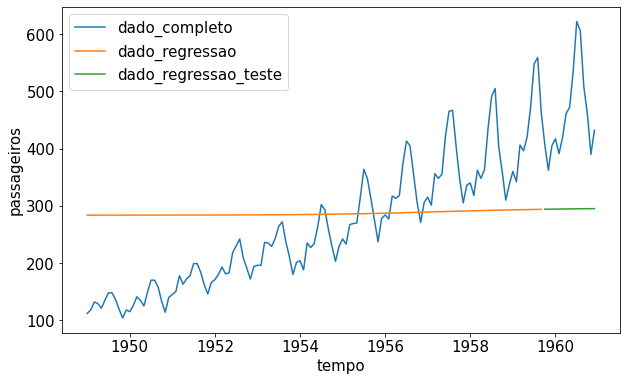

In [39]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_tranf, label='dado_regressao')
sns.lineplot(x='tempo', y='passageiros', data=resultados_tranf_teste, label='dado_regressao_teste')

In [40]:
vetor =pd.DataFrame(y_treino)[0]

#Mudando o Problema: Tentando prever o numero de passageiros para o ano seguinte

In [41]:
import numpy as np
def separa_dados(vetor, n_passos):
  x_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

In [42]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [43]:
vetor2 = pd.DataFrame(y_teste)[0]

In [44]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)
x_teste_novo[0:5]

array([[1.05982773],
       [0.68341317],
       [1.04309819],
       [1.14347541],
       [0.92599144]])

In [45]:
#Criando uma nova rede para series temporais

In [46]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1, kernel_initializer='Ones',activation = 'linear', use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [47]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [48]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8264
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7633
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7243
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7098
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6901
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6725
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6510
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6239
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5983
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5713
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5396
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5057
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [49]:
y_predict_novo = regressor3.predict(x_treino_novo)

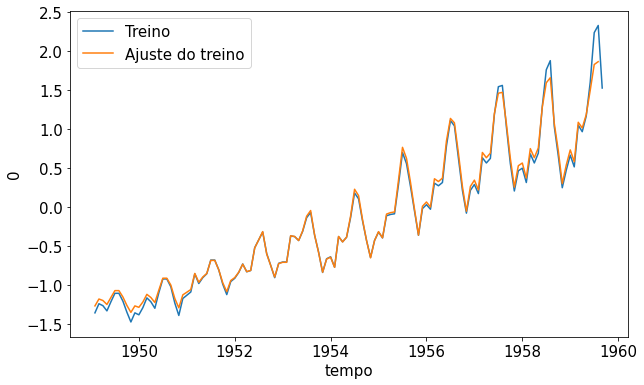

In [50]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='Treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste do treino')


In [51]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

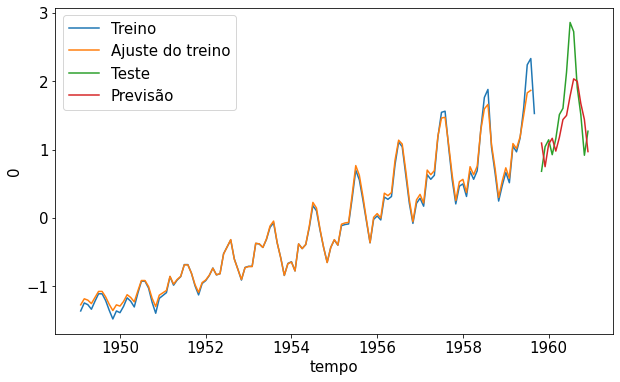

In [52]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='Treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste do treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[130:144], label='Teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='Previsão')

#Redes recorrente = recebe o y, boa para receber o histórico

In [53]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')

In [54]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [55]:
#convertendo horas
bike['datas'] = pd.to_datetime(bike.datas)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

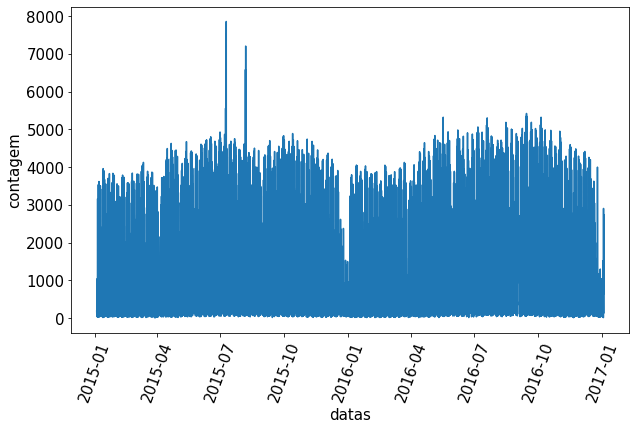

In [56]:
sns.lineplot(x='datas', y='contagem', data= bike)
plt.xticks(rotation = 70)

In [57]:
#escalonando os dados 
sc2 = StandardScaler()
sc2.fit(bike.contagem.values.reshape(-1,1))
y = sc2.transform(bike.contagem.values.reshape(-1,1))

In [58]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [59]:
y_treino = y[0:tamanho_treino]
y_teste = y[tamanho_treino: len(bike)]

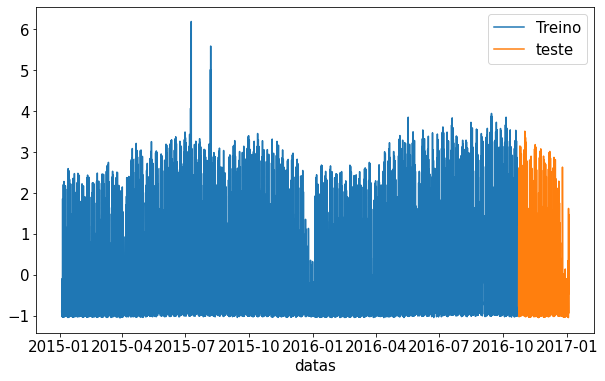

In [60]:
sns.lineplot(x='datas', y=y_treino[:,0], data=bike[0:tamanho_treino], label= "Treino")
sns.lineplot(x='datas', y=y_teste[:,0], data=bike[tamanho_treino:len(bike)], label= "teste")

In [61]:
vetor = pd.DataFrame(y_treino)[0]
vetor2 = pd.DataFrame(y_teste)[0]

In [62]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [63]:
x_treino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

##O que a rede recorrente espera receber
um vetor de três dimensões

In [64]:
x_treino_novo = x_treino_novo.reshape(x_treino_novo.shape[0], x_treino_novo.shape[1], 1)

In [65]:
x_teste_novo = x_teste_novo.reshape(x_teste_novo.shape[0], x_teste_novo.shape[1], 1)

##Criando as camadas

In [66]:
from tensorflow.keras.layers import LSTM
recorrente = Sequential()

In [67]:
recorrente.add(LSTM(128, input_shape=(x_treino_novo.shape[1],x_treino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [68]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [69]:
recorrente.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [72]:
resultado = recorrente.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0596 - val_loss: 0.0433
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0479 - val_loss: 0.0512
Epoch 3/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0425 - val_loss: 0.0252
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0397 - val_loss: 0.0276
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0375 - val_loss: 0.0253
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0352 - val_loss: 0.0232
Epoch 7/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0343 - val_loss: 0.0203
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0329 - val_loss: 0.0240
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0317 - val_loss: 0.0190
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.031

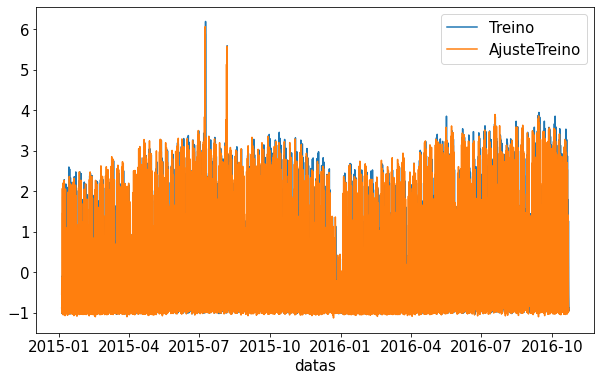

In [83]:
#Avaliando o LSTM
y_ajustado = recorrente.predict(x_treino_novo)
sns.lineplot(x='datas', y=y_treino[:,0], data=bike[0:tamanho_treino], label="Treino")
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label="AjusteTreino")

In [84]:
y_predito = recorrente.predict(x_teste_novo)

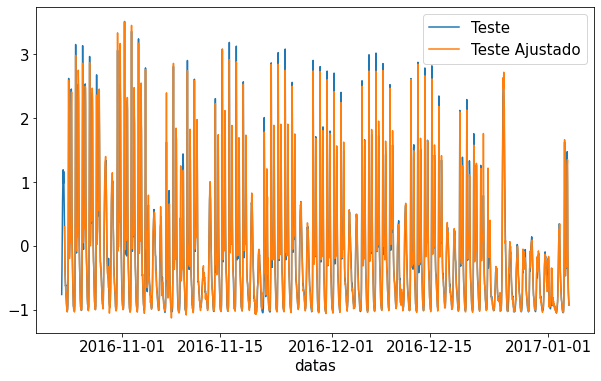

In [85]:
sns.lineplot(x='datas', y=y_teste[:,0], data=bike[tamanho_treino: len(bike)], label="Teste")
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino+ 10: len(bike)], label="Teste Ajustado")

#ALternativa a rede recorrente LSTM a Unidade recorrente fechada (GRU)
* Mais rápida

* Quando possui sequência menores

In [86]:
from tensorflow.keras.layers import GRU

In [92]:
recorrente_gru = Sequential()

In [93]:
recorrente_gru.add(GRU(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente_gru.add(Dense(units=1))

In [94]:
recorrente_gru.compile(loss='mean_squared_error', optimizer="RMSProp")

In [98]:
recorrente.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [97]:
recorrente_gru.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 128)               50304     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [100]:
resulado2 = recorrente_gru.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0667 - val_loss: 0.0416
Epoch 2/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0507 - val_loss: 0.0347
Epoch 3/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0431 - val_loss: 0.0232
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0381 - val_loss: 0.0211
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0356 - val_loss: 0.0208
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0341 - val_loss: 0.0241
Epoch 7/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0329 - val_loss: 0.0191
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0315 - val_loss: 0.0236
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0305 - val_loss: 0.0194
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.029

In [101]:
y_predito_2 = recorrente_gru.predict(x_teste_novo)

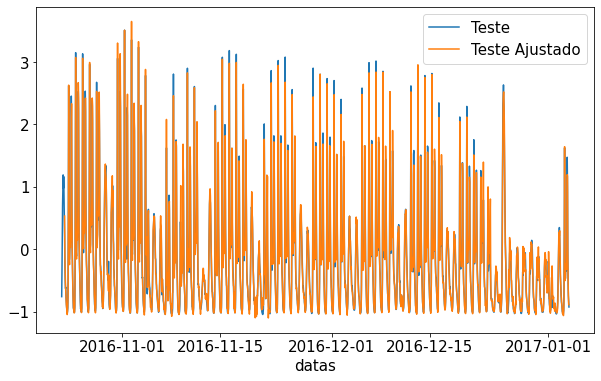

In [103]:
sns.lineplot(x='datas', y=y_teste[:,0], data=bike[tamanho_treino: len(bike)], label="Teste")
sns.lineplot(x='datas', y=y_predito_2[:,0], data=bike[tamanho_treino+ 10: len(bike)], label="Teste Ajustado")